In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('D:/SMA EXP/tweets_1.csv')
df.head()

,id,Tweet
0,0.0,@BendingFrames It really is. Another popular ...
1,1.0,This is an incredible technology - brilliant s...
2,2.0,@CRYPTODETECTOR9 Now that technology is changi...
3,3.0,@Membur3 @ktibus @krassenstein @NickAdamsinUSA...
4,4.0,@kayfey I really can't fathom not having any g...


In [5]:
df.isnull().sum()

id       1980
Tweet    1980
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

id       0
Tweet    0
dtype: int64

In [9]:
from textblob import TextBlob
def get_subjectivity(text):
  return TextBlob (text).sentiment.subjectivity
def get_polarity (text):
  return TextBlob (text).sentiment.polarity
df['subjectivity']=df['Tweet'].apply(get_subjectivity)
df['polarity']=df['Tweet'].apply(get_polarity)
df

,id,Tweet,subjectivity,polarity
0,0.0,@BendingFrames It really is. Another popular ...,0.360000,0.250000
1,1.0,This is an incredible technology - brilliant s...,0.950000,0.900000
2,2.0,@CRYPTODETECTOR9 Now that technology is changi...,0.435909,-0.172727
3,3.0,@Membur3 @ktibus @krassenstein @NickAdamsinUSA...,0.600000,0.700000
4,4.0,@kayfey I really can't fathom not having any g...,0.200000,0.200000
5,5.0,IICA's first TECHNOLOGY EXPO coming to Wagga W...,0.333333,0.488281
6,6.0,@unusual_whales @PixiaAi $pixia #tellme . How ...,0.000000,0.000000
7,7.0,Good for you Ryan! Is anyone telling Presiden...,0.600000,0.491667
8,8.0,@lndian_Bronson Dark times ahead. Invest in ra...,0.400000,-0.150000
9,9.0,Machine learning/Data science beginner cycle:\...,0.350000,0.050000


In [10]:
threshold=0.01
df['sentiment'] = df['polarity'].apply(
lambda x: "Positive" if x >= threshold
else ("Negative" if x < -threshold else "Neutral"))
df['sentiment'].value_counts()

sentiment
Positive    13
Negative     3
Neutral      2
Name: count, dtype: int64

<Axes: ylabel='sentiment'>

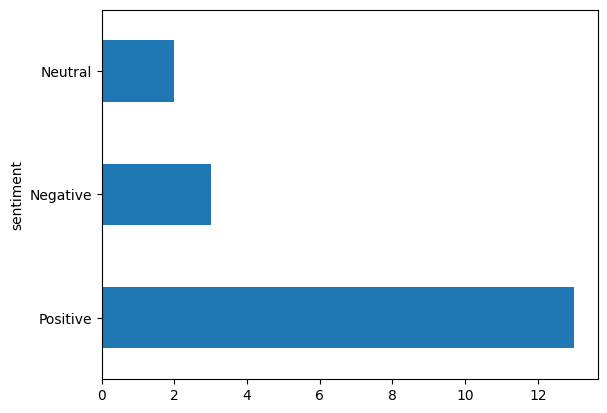

In [11]:
df['sentiment'].value_counts().plot.barh()

In [12]:
df_positive=df[df ['sentiment']=='Positive']
df_negative=df[df['sentiment']=='Negative']
df_neutral=df[df['sentiment']=='Neutral']
from wordcloud import WordCloud
def generate_wordcloud (text):
 wordcloud = WordCloud (width=800, height=400, background_color='white').generate (text)
 plt.figure(figsize=(10, 5))
 plt.imshow(wordcloud,interpolation='lanczos')
 plt.axis('off')
 plt.show()

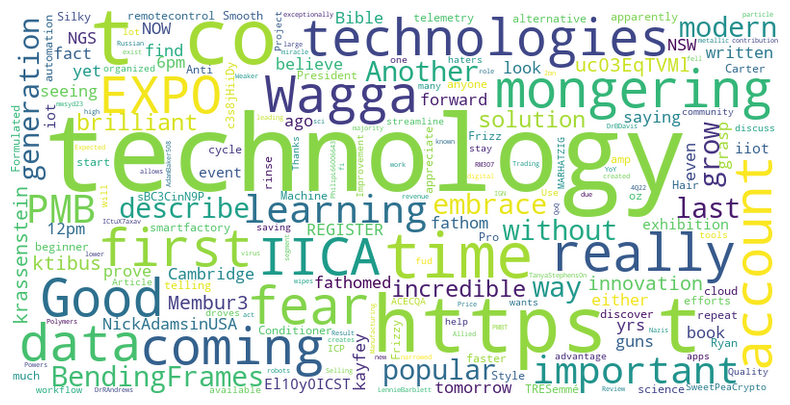

In [14]:
generate_wordcloud(' '.join(df_positive['Tweet']))

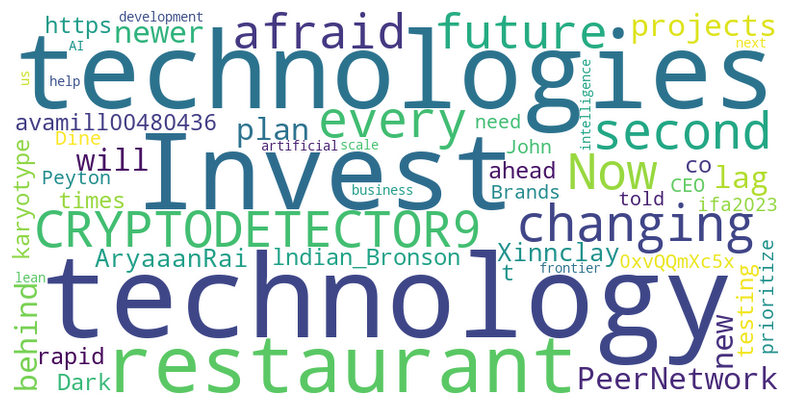

In [16]:
generate_wordcloud(' '.join(df_negative['Tweet']))

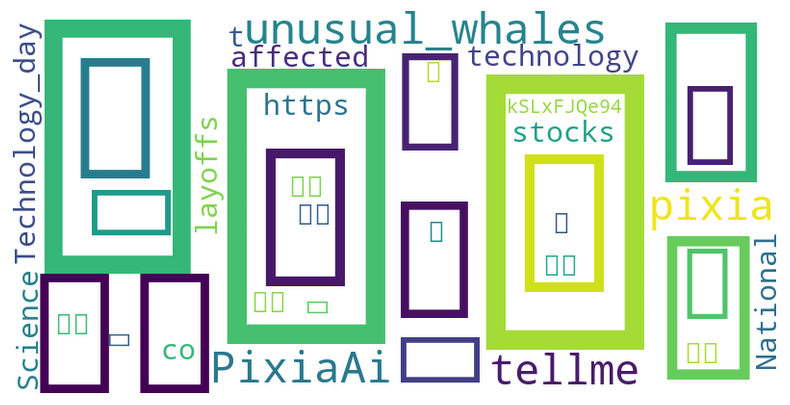

In [17]:
generate_wordcloud(' '.join(df_neutral['Tweet']))